In [1]:
import sys
sys.path.append('../..')
from TO.utils import check_package_status
check_package_status()

from experiments.utils import set_plt_template
set_plt_template()

<div class="alert alert-block alert-success" style="font-size: 14px; border-radius: 10px"><h4>[GO] TO @ d1eeb64bc612c648771813c4a344c44b687080f0</h4><pre>  ✅ No changes found in the ./TO packge.</pre></div>

In [2]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt

experiments = glob('./results/*/')
budget = lambda d : d*100
runs = 30

results = {}
for exp in experiments:
    if ('ELA' in exp) : continue
    evals = np.empty((runs, budget(int(exp.split('/')[-2].split('-')[0][:-1]))))
    evals[:] = np.inf
    for i in range(runs):
        fn = os.path.join(exp, f'{i+1}/evals.dat')
        if os.path.exists(fn):
            with open(fn, 'r') as handle : lines = handle.readlines()
            f = np.array([float(line.split()[1]) for line in lines])
            evals[i,:f.size] = f
    evals_min = np.minimum.accumulate(evals, axis=1)
    evals_min = evals_min[evals_min[:,0] != np.inf]
    results[exp.split('/')[-2]] = evals_min

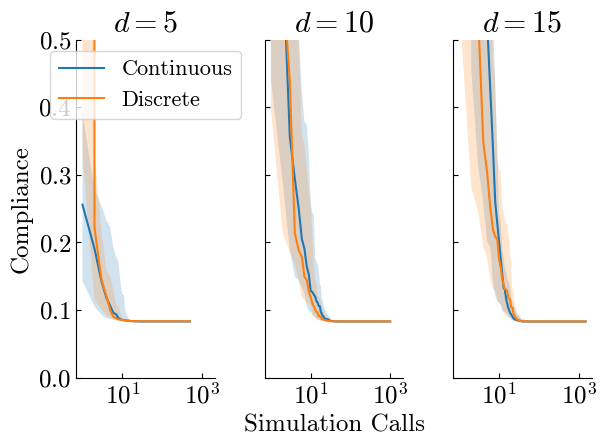

In [14]:
fig, ax = plt.subplots(1, 3, sharey=True, sharex=True)

for (i, dim) in enumerate((5, 10, 15)):
    for mode in ('continuous', 'discrete'):

        Q2 = np.median(results[f'{dim}D-{mode}'], axis=0)
        (Q1, Q3) = np.percentile(results[f'{dim}D-{mode}'], [25, 75], axis=0)

        ax[i].semilogx(np.arange(Q2.size)+1, Q2, label=mode.capitalize())
        ax[i].fill_between(np.arange(Q2.size)+1, Q1, Q3, alpha=.2)
        ax[i].set_ylim(0, 0.5)
        ax[i].set_title(f'$d={dim}$')

ax[0].legend(fontsize=16, loc='upper center')
ax[0].set_ylabel('Compliance')
ax[1].set_xlabel('Simulation Calls')

fig.tight_layout()

In [ ]:
for mode in ('continuous', 'discrete') :
    print(mode)
    for d in (5, 10, 15) : 
        Q2 = np.median(results[f'{d}D-{mode}'][:,-1])
        (Q1, Q3) = np.percentile(results[f'{d}D-{mode}'][:,-1], [25, 75])
        print(f'{d:02d} {Q1:.4f} {Q2:.4f} {Q3:.4f}')
    print('_'*50)

continuous
05 0.0830 0.0830 0.0831
10 0.0827 0.0830 0.0830
15 0.0821 0.0829 0.0830
__________________________________________________
discrete
05 0.0832 0.0833 0.0835
10 0.0831 0.0832 0.0833
15 0.0826 0.0831 0.0838
__________________________________________________


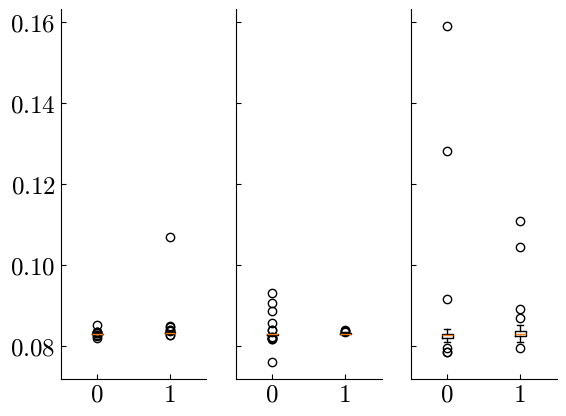

In [17]:
fig, ax = plt.subplots(1, 3, sharey=True)

for (i, d) in enumerate((5, 10, 15)) : 
    for (j, mode) in enumerate(('continuous', 'discrete')) :
        evals_min = results[f'{d}D-{mode}'][:,-1]
        ax[i].boxplot(evals_min, positions=[j])